最近正在学[Applied Plotting, Charting & Data Representation in Python](https://www.coursera.org/learn/python-plotting/home/welcome), 老师在第一周的课程中先讲了一遍统计图的审美, 其中有一段是展示如何将图中无用的部分清除, 所谓Dejunkify, 以强调显示主题. 感觉非常好. 完成第二周的作业后, 我应该是能够用matplotlib进行基本的画图了. 所以试着把这个例子重现一遍. 

课程中的例子来自于[Dark Horse](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)

> 爱德华·图夫特（Edward Tufte）在他1983年经典的著作[“量化信息的视觉显示”](http://www.humanities.ufl.edu/pdf/tufte-aesthetics_and_technique.pdf)（The Visual Display of Quantitative Information） 一书中指出：“数据墨水(Data-ink)是图像中不可抹去的核心，是为了反映数字的变化而安排的不可或缺的印迹”

> Edward Tufte introduced the concept of data-ink in his 1983 classic The Visual Display of Quantitative Information. In it he states "Data-ink is the non-erasable core of the graphic, the non-redundant ink arranged in response to variation in the numbers represented" (emphasis mine).

一个"好"的统计图, 应当是尽可能多的保留data ink, 尽可能少的chart junk. 这一段动画显示了如何把一个凌乱的统计图删减到只包含必要的"Data-ink"的过程. 
![](http://static1.squarespace.com/static/56713bf4dc5cb41142f28d1f/5671e8bf816924fc22651410/5671eae2816924fc2265189a/1450306274301/data-ink.gif)

接下来我试着用matplotlib重现这个过程, 也算是参照[matplotlib cheat sheet](../cheatsheet/Matplotlib_cheat_sheet) 的一次练习. 
<!-- TEASER_END -->


# 基本数据 

数据很简单, 五种食物中每100g所含的热量. 以卡路里为单位: 

* 炸薯条: 607
* 薯片: 542
* 培根: 533
* 披萨: 296
* 热狗: 260

In [68]:
import matplotlib.pyplot as plt
import pandas as pd
% matplotlib inline

cal=[607,542,533,296,260]
food=["French \n Fries", "Potato\nChips", "Bacon", "Pizza", "Chili Dog"] # 我没办法使用中文label, 至少目前是
df= pd.Series(data=cal,index=food)
df

French \n Fries    607
Potato\nChips      542
Bacon              533
Pizza              296
Chili Dog          260
dtype: int64

# matplotlib绘图策略

之前说过[pandas的最佳实践](../pandaszhong-ji-he-de-yun-suan)是: 
1. 确定你需要的数据文件是什么名字
1. 去stackoverflow搜数据文件名字看看教程. 
1. 如果不能满足自己的要求, 提个问题, 然后等一周. 

对于MatPlotLib, 我估计最佳实践是这样的: 
1. 打开[matplotlib的gallery](https://matplotlib.org/gallery/)
1. 看看那张图长得像你想要的. 
1. 打开链接然后copy代码改改. 




# 基础bar图

三句话, 看起来还蛮简洁的. 所以我决定先去实现最终效果. 然后逆序表现Dejunkify过程. 说实话还挺难的

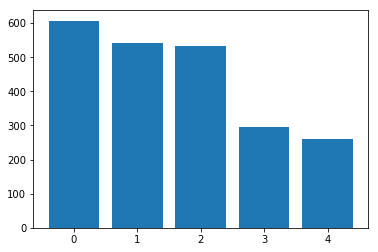

In [72]:
fig, ax = plt.subplots()
plt.bar(range(5),df)
plt.show()

# Dejunkify版本

In [234]:
# 自动标注数字
def autolabel(rects): 
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2., 
                 height-50, 
                 int(height),
                 color="w",
                 horizontalalignment='center'
                )
def autoticks(rect,ticks):
    for rect,tick in zip(rects,ticks):
        plt.text(rect.get_x()+rect.get_width()/2., 
                 -80, 
                 tick,
                 horizontalalignment='center'
                )

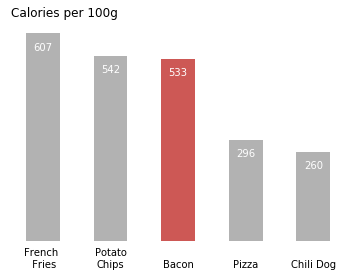

In [242]:
fig, ax = plt.subplots()

# 自定义plot时的参数
colors=['#B2B2B2','#B2B2B2',"#CD5855",'#B2B2B2','#B2B2B2']
spines_visible={"top":False,
                  "bottom":False,
                  "right":False,
                  "left":False}

# 设置外框
for key,value in spines_visible.items():
    ax.spines[key].set_visible(value)
    
    

# title
plt.title('Calories per 100g', loc='left') # 如果使用ax.set(title=...), 不知道怎么设定loc

rects = plt.bar(range(5),df,width =0.5,color=colors)

# ticks
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
autoticks(rects,food)

# labels 
autolabel(rects)
plt.show()

其实, 相对后面的来说, 这个最简洁的版本反而是最容易写的. 其中稍微有点复杂的是要直接标注数字, 在这里是使用了plt.text往上写的. 

当使用plt.bar绘制柱状图以后, 原来产生了一个柱子的列表, 可以用for来循环访问每个柱子的参数. 通过这种方法把每个柱子上标记上数字. 

另一个困难是如果把x轴上的线去掉, xticks还在的话, 会出现一个细小的竖线标记. 所以只好用标记数字的方法把xticks标记在底部了. 

# (undo) Direct Label

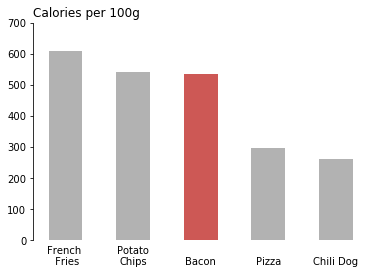

In [243]:
fig, ax = plt.subplots()

# 自定义plot时的参数
colors=['#B2B2B2','#B2B2B2',"#CD5855",'#B2B2B2','#B2B2B2']
spines_visible={"top":False,
                  "bottom":False,
                  "right":False,
                  "left":True}
# 设置外框
for key,value in spines_visible.items():
    ax.spines[key].set_visible(value)

# title
plt.title('Calories per 100g', loc='left')

# Limits
ax.set_ylim(0,700)

# ticks
ax.xaxis.set_visible(False)

rects=plt.bar(range(5),df,width =0.5,color=colors)
autoticks(rects,food)


plt.show()

显示y轴很容易, matplotlib把四面的框叫做spines, 可以分别设定每个spine.set_visible()是True还是False, 注意还需要指定y轴的范围: ax.set_ylim(0,700)

# (undo) Remove Lines

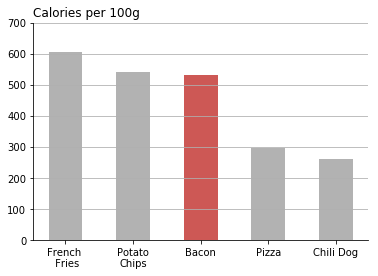

In [247]:
fig, ax = plt.subplots()

# 自定义plot时的参数
colors=['#B2B2B2','#B2B2B2',"#CD5855",'#B2B2B2','#B2B2B2']
spines_visible={"top":False,"bottom":True,"right":False,"left":True}

# 设置外框
for key,value in spines_visible.items():
    ax.spines[key].set_visible(value)

# title
plt.title('Calories per 100g', loc='left')

# Limits
ax.set_ylim(0,700)

# ticks
ax.xaxis.set(ticks=range(5), ticklabels=food )

# grid
plt.grid(axis='y') # 我不知道怎么设定 zorder

plt.bar(range(5),df,width =0.5,color=colors)
plt.show()

水平的格线叫做grid, 如果是水平竖直都要, axis="both", 在[grid的说明](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.grid.html)中, 提到可以使用zorder, 但我试过很多数值, 也没办法把水平格线放到柱子后面去. 

# (undo)Remove Shade

增加阴影效果太难找了, 最后[终于找到](https://matplotlib.org/users/transforms_tutorial.html#using-offset-transforms-to-create-a-shadow-effect), 
原来是要用transforms重新画一遍! 

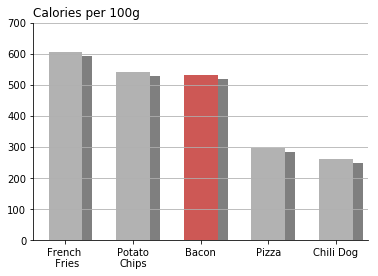

In [256]:
import matplotlib.patches as patches
import matplotlib.transforms as transforms

fig, ax = plt.subplots()

# 自定义plot时的参数
colors=['#B2B2B2','#B2B2B2',"#CD5855",'#B2B2B2','#B2B2B2']
spines_visible={"top":False,
                  "bottom":True,
                  "right":False,
                  "left":True}

# 设置外框
for key,value in spines_visible.items():
    ax.spines[key].set_visible(value)

# title
plt.title('Calories per 100g', loc='left')

# Limits
ax.set_ylim(0,700)

# ticks
ax.xaxis.set(ticks=range(5), ticklabels=food )


rects = plt.bar(range(5),df,width =0.5,color=colors)

# Shadow Effect!!

# shift the object over 2 points, and down 2 points
dx, dy = 10/72., -4/72.
offset = transforms.ScaledTranslation(dx, dy,
  fig.dpi_scale_trans)
shadow_transform = ax.transData + offset

# now plot the same data with our offset transform;
# use the zorder to make sure we are below the line
plt.bar(range(5),df,width =0.5,color='black', alpha = 0.5,
  transform=shadow_transform,
  zorder=0.9*1)

ax.grid(axis='y',zorder=0.1) # 我不知道怎么设定zorder

plt.show()



画阴影这件事太可怕了, 我可不想做第二遍了. 很奇怪的是与grid不同, 在画阴影的时候是可以设定zorder的

# (undo)Remove special effect

原图上是每个柱子还有个隆起的3D效果, 我直接放弃了. 

# (undo)Reduce Colors

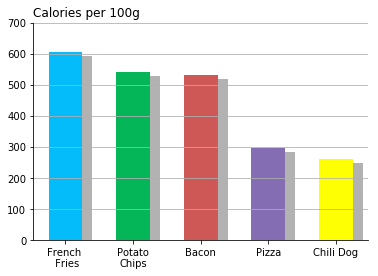

In [254]:
fig, ax = plt.subplots()

# 自定义plot时的参数
colors=['#05BCFA','#05B659',"#CD5855",'#856DB4','#FDFF02']
spines_visible={"top":False,
                  "bottom":True,
                  "right":False,
                  "left":True}

# 设置外框
for key,value in spines_visible.items():
    ax.spines[key].set_visible(value)

# title
plt.title('Calories per 100g', loc='left')

# Limits
ax.set_ylim(0,700)

# ticks
ax.xaxis.set(ticks=range(5), ticklabels=food )



rects = plt.bar(range(5),df,width =0.5,color=colors)

# Shadow Effect!!

# shift the object over 2 points, and down 2 points
dx, dy = 10/72., -4/72.
offset = transforms.ScaledTranslation(dx, dy,
  fig.dpi_scale_trans)
shadow_transform = ax.transData + offset

# now plot the same data with our offset transform;
# use the zorder to make sure we are below the line
plt.bar(range(5),df,width =0.5,color='black', alpha = 0.3,
  transform=shadow_transform,
  zorder=0.9*1)

ax.grid(axis='y',zorder=0.1) # 我不知道怎么设定zorder

plt.show()

# (undo)Remove Borders

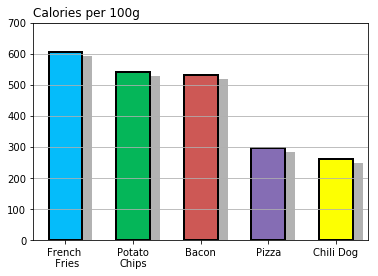

In [213]:
fig, ax = plt.subplots()
fig.set_edgecolor("black")
# 自定义plot时的参数
colors=['#05BCFA','#05B659',"#CD5855",'#856DB4','#FDFF02']
spines_visible={"top":True,
                  "bottom":True,
                  "right":True,
                  "left":True}

# 设置外框
for key,value in spines_visible.items():
    ax.spines[key].set_visible(value)

# title
plt.title('Calories per 100g', loc='left')

# Limits
ax.set_ylim(0,700)

# ticks
ax.xaxis.set(ticks=range(5), ticklabels=food )



rects = plt.bar(range(5),df,width =0.5,color=colors, edgecolor="black",linewidth=2)

# Shadow Effect!!

# shift the object over 2 points, and down 2 points
dx, dy = 10/72., -4/72.
offset = transforms.ScaledTranslation(dx, dy,
  fig.dpi_scale_trans)
shadow_transform = ax.transData + offset

# now plot the same data with our offset transform;
# use the zorder to make sure we are below the line
plt.bar(range(5),df,width =0.5,color='black', alpha = 0.3,
  transform=shadow_transform,
  zorder=0.9*1)

ax.grid(axis='y',zorder=0.1) # 我不知道怎么设定zorder

plt.show()

border的设定, 一般是edgecolor来做, 多个元素看起来都可以画edgecolor

# (undo)Remove redundant labels

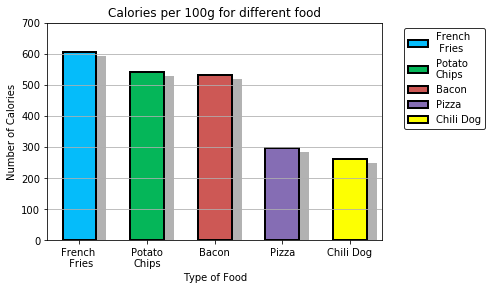

In [265]:
fig, ax = plt.subplots()
fig.set_edgecolor("black")
# 自定义plot时的参数
colors=['#05BCFA','#05B659',"#CD5855",'#856DB4','#FDFF02']
spines_visible={"top":True,
                  "bottom":True,
                  "right":True,
                  "left":True}

# 设置外框
for key,value in spines_visible.items():
    ax.spines[key].set_visible(value)

# Limits
ax.set_ylim(0,700)

# ticks
ax.xaxis.set(ticks=range(5), ticklabels=food )


rects = plt.bar(range(5),df,width =0.5,color=colors, edgecolor="black",linewidth=2)

# Shadow Effect!!

# shift the object over 2 points, and down 2 points
dx, dy = 10/72., -4/72.
offset = transforms.ScaledTranslation(dx, dy,
  fig.dpi_scale_trans)
shadow_transform = ax.transData + offset

# now plot the same data with our offset transform;
# use the zorder to make sure we are below the line
plt.bar(range(5),df,width =0.5,color='black', alpha = 0.3,
  transform=shadow_transform,
  zorder=0.9*1)

ax.grid(axis='y',zorder=0.1) # 我不知道怎么设定zorder

# labels
ax.set(title="Calories per 100g for different food",
       xlabel="Type of Food",
       ylabel="Number of Calories"
      )
plt.legend(rects,food, bbox_to_anchor=(1.05, 1), edgecolor="black",  loc=2)

plt.show()

可以用ax.set来统一设定title, xlabel, ylable

legend设定是, 如果是plt.plot画线的图, 可以在每条线上设定label, 那么legend的时候可以自动找到label的标记. 但bar图里, 大概还是要把柱子和标签分别放上. 注意legend的位置, 默认是在图片内定位的, 用loc的时候总在图里面转来转去, 要把legend放在图片外面, 需要设定它的bbox_to_anchor, 参考[legend guide](https://matplotlib.org/2.0.0/users/legend_guide.html#legend-location)

# (undo)Remove Background Colors

如此村儿的配色, 难道原作是用的MS Powerpoint?

原作中还用的是图片作为底色, 我还没学会. 先用纯色好了. 

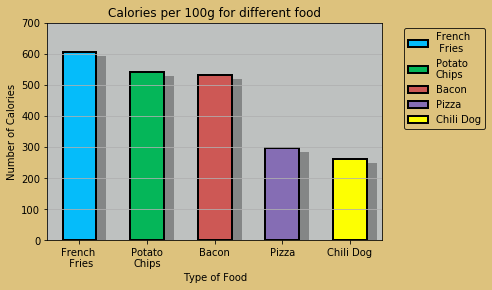

In [259]:
fig, ax = plt.subplots(facecolor='#DDC27D')

fig.set_edgecolor("black")
ax.set_facecolor("#BEC1C0")
# 自定义plot时的参数
colors=['#05BCFA','#05B659',"#CD5855",'#856DB4','#FDFF02']
spines_visible={"top":True,
                  "bottom":True,
                  "right":True,
                  "left":True}

# 设置外框
for key,value in spines_visible.items():
    ax.spines[key].set_visible(value)

# Limits
ax.set_ylim(0,700)

# ticks
ax.xaxis.set(ticks=range(5), ticklabels=food )


rects = plt.bar(range(5),df,width =0.5,color=colors, edgecolor="black",linewidth=2,
               # backgroundcolor="#BEC1C0"
               )

# Shadow Effect!!

# shift the object over 2 points, and down 2 points
dx, dy = 10/72., -4/72.
offset = transforms.ScaledTranslation(dx, dy,
  fig.dpi_scale_trans)
shadow_transform = ax.transData + offset

# now plot the same data with our offset transform;
# use the zorder to make sure we are below the line
plt.bar(range(5),df,width =0.5,color='black', alpha = 0.3,
  transform=shadow_transform,
  zorder=0.9*1)

ax.grid(axis='y',zorder=0.1) # 我不知道怎么设定zorder

# labels
ax.set(title="Calories per 100g for different food",
       xlabel="Type of Food",
       ylabel="Number of Calories"
      )
ax.legend(rects,food,facecolor='#DDC27D',
          edgecolor="black",
          bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

facecolor是一个常用的设定名称, 在fig,ax,legend里面都是用的facecolor来设定颜色. 在matplotlib 2.0以后的版本里, 已经没有bgcolor这样的设定了. 

注意bar图里面的背景色, 并不是在plt.bar里设定facecolor为灰色, 而是设定在ax里. 不清楚这样的理由何在. 

总之, 要实现一个看起来酷似MS PowerPoint制作的bar图还是见挺费劲的事情. 就算是为了自己, 也得宣传"Less is More"

# 补充: 如何选取颜色

最后要补充一下, 为了原样还原配色, 我用了mac预览中的取色工具, 找到原作中颜色的十六进制代码. 
![](https://i.loli.net/2018/01/21/5a6369bca5076.png)

# 综上

结论是如果做乙方的话, 一定要花足够长的时间给甲方洗脑, 洗到less is more形成本能. 如果你省掉了什么时间, 一定会乘10花到工作时间上. 

因为, 要做一张难看的图实在是需要写太多代码了!